In [1]:
# importing csv module
import csv
  
# csv file name
filename = "TestData.csv"
  
# initializing the titles and rows list
fields = []
rows = []
  
# reading csv file
with open(filename, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)
      
    # extracting field names through first row
    fields = next(csvreader)
  
    # extracting each data row one by one
    for row in csvreader:
        rows.append(row)

In [2]:
#Extracting CSV Headers
NewFields = [i.split('\t') for i in fields][0]
NewFields

['Indel',
 'Chr-Pos',
 'MultiSampleCount',
 'MultiAlleleCount',
 'NearbyIndelCount25bp',
 'RecurrentIndel']

In [3]:
#Creating Rows for pandas DataFrame
NewRows = []
for row in rows:
    for i in row:
        NewRows.append(i.split('\t'))

In [4]:
#Load CSV data in as DataFrame
import pandas as pd
df = pd.DataFrame(NewRows,columns = NewFields)
df

,Indel,Chr-Pos,MultiSampleCount,MultiAlleleCount,NearbyIndelCount25bp,RecurrentIndel
0,1-100000989-A-ATC,1-100000989,11,1,1,TRUE
1,1-100001151-GT-G,1-100001151,1,1,2,TRUE
2,1-100001168-TG-T,1-100001168,1,1,2,TRUE
3,1-100001497-TA-T,1-100001497,1,1,1,FALSE
4,1-100001671-C-CTT,1-100001671,5,4,1,TRUE
...,...,...,...,...,...,...
15022039,Y-9992125-AT-A,Y-9992125,3,1,1,TRUE
15022040,Y-9992151-TA-T,Y-9992151,6,1,2,TRUE
15022041,Y-9992174-AC-A,Y-9992174,7,1,2,TRUE
15022042,Y-9994833-TAATG-T,Y-9994833,2,1,1,TRUE


In [5]:
Chrom_Dict = {}
for i in range(0,len(df['Chr-Pos'].tolist())):
    Chromosome,Pos = df['Chr-Pos'][i].split('-')
    if Chromosome not in Chrom_Dict:
        Chrom_Dict[Chromosome] = [int(Pos)]
    else:
        Chrom_Dict[Chromosome].append(int(Pos))

In [6]:
for key, value in Chrom_Dict.items():
    vals = sorted(value)
    Chrom_Dict[key] = vals

In [7]:
ChromPosDifference = {}
import numpy as np
for key,value in Chrom_Dict.items():
    val =  abs(np.diff(value))
    ChromPosDifference[key] = val.tolist()


In [8]:
CounterList = []
for key, value in ChromPosDifference.items():
    counter_dict = {}
    for i in value:
        if i in counter_dict:
            counter_dict[i] += 1
        else:
            counter_dict[i] = 1
    CounterList.append(counter_dict)

In [45]:
Chromosomes = list(Chrom_Dict.keys())
PositionCounter = dict(zip(Chromosomes, CounterList))

In [46]:
for key, value in PositionCounter.items():
    newval = dict(sorted(PositionCounter[key].items(), key=lambda item: item[0]))
    PositionCounter[key] = newval

In [47]:
for key, value in PositionCounter.items():
    print(key,type(key))

1 <class 'str'>
10 <class 'str'>
11 <class 'str'>
12 <class 'str'>
13 <class 'str'>
14 <class 'str'>
15 <class 'str'>
16 <class 'str'>
17 <class 'str'>
18 <class 'str'>
19 <class 'str'>
2 <class 'str'>
20 <class 'str'>
21 <class 'str'>
22 <class 'str'>
3 <class 'str'>
4 <class 'str'>
5 <class 'str'>
6 <class 'str'>
7 <class 'str'>
8 <class 'str'>
9 <class 'str'>
X <class 'str'>
Y <class 'str'>


In [48]:
X = PositionCounter['X']
Y = PositionCounter['Y']

In [49]:
del(PositionCounter['X'])
del(PositionCounter['Y'])

In [61]:
PositionCounter = {int(key):value for key,value in sorted(PositionCounter.items())}

In [64]:
PositionCounter['X'] = X
PositionCounter['Y'] = Y

In [367]:
for key, value in PositionCounter.items():
    print(key,type(key))

1 <class 'int'>
2 <class 'int'>
3 <class 'int'>
4 <class 'int'>
5 <class 'int'>
6 <class 'int'>
7 <class 'int'>
8 <class 'int'>
9 <class 'int'>
10 <class 'int'>
11 <class 'int'>
12 <class 'int'>
13 <class 'int'>
14 <class 'int'>
15 <class 'int'>
16 <class 'int'>
17 <class 'int'>
18 <class 'int'>
19 <class 'int'>
20 <class 'int'>
21 <class 'int'>
22 <class 'int'>
X <class 'str'>
Y <class 'str'>


In [181]:
Chromosomes = list(Chrom_Dict.keys())
SexChroms = Chromosomes[-2:]
Chromosomes.remove('X')
Chromosomes.remove('Y')

In [182]:
Chromosomes = [int(chrom) for chrom in Chromosomes]
Chromosomes = sorted(Chromosomes)

In [183]:
Chromosomes.extend(SexChroms)

In [350]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

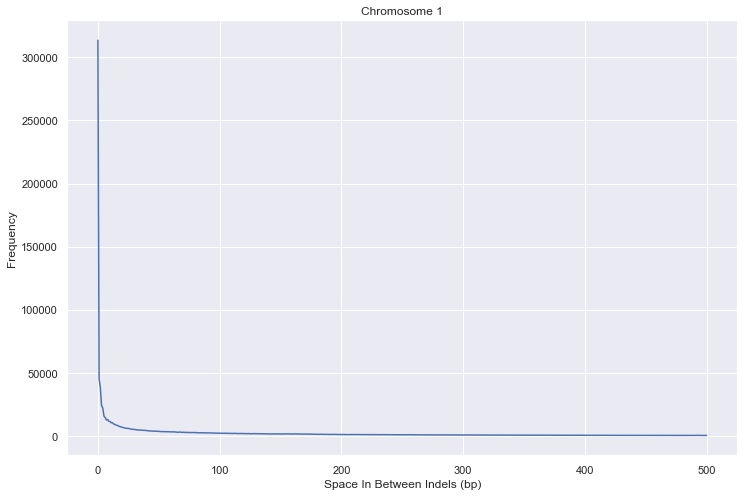

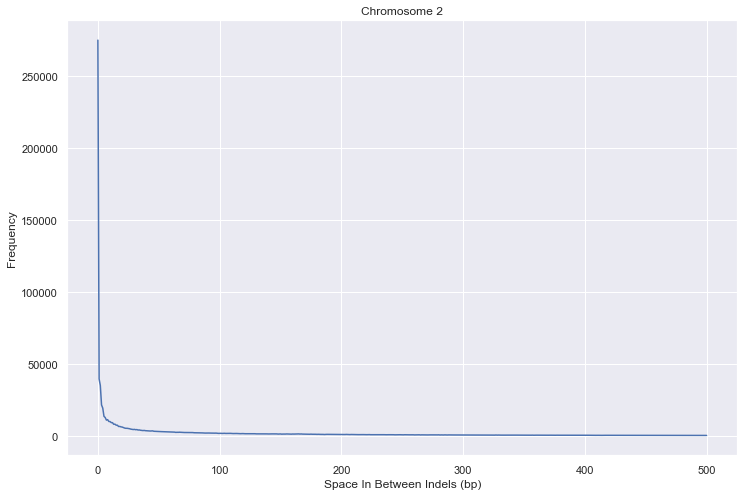

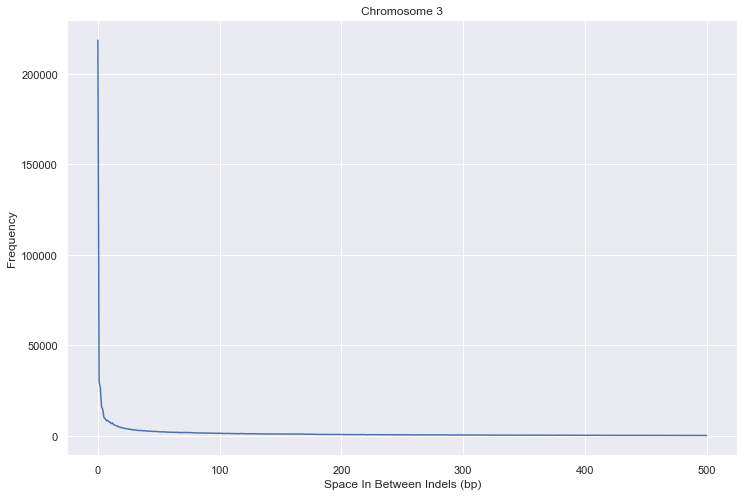

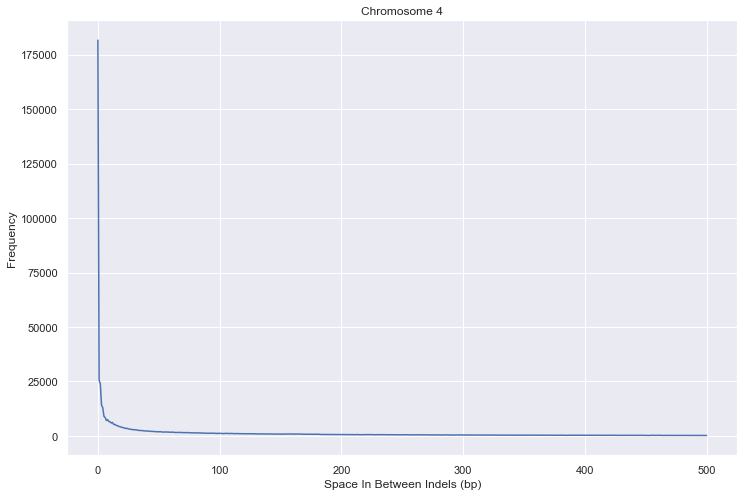

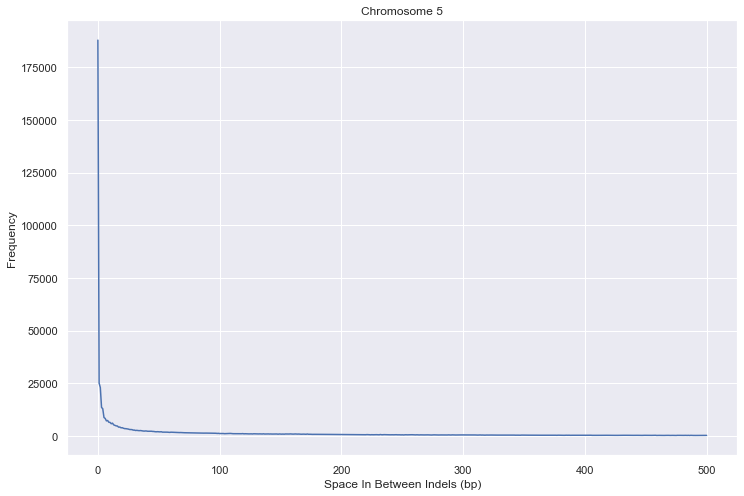

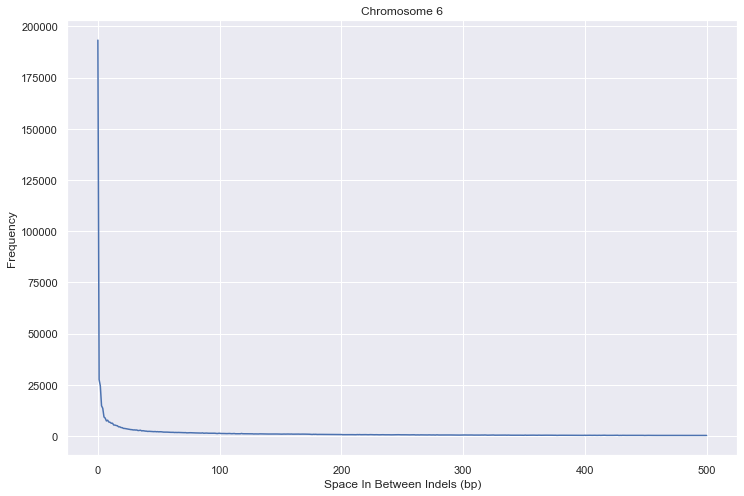

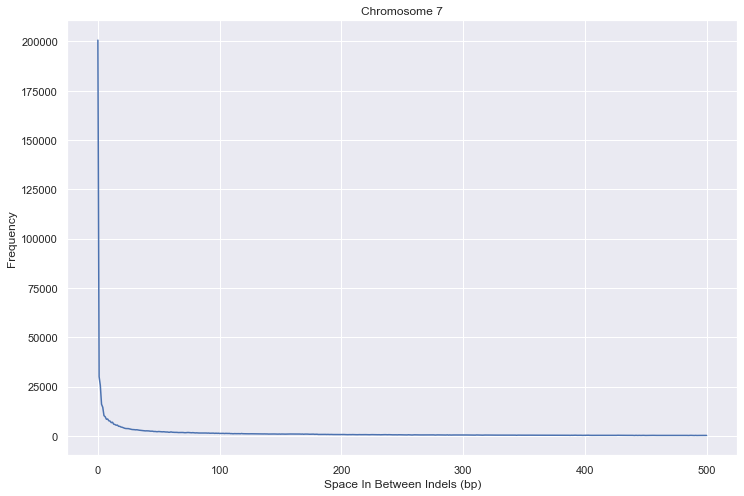

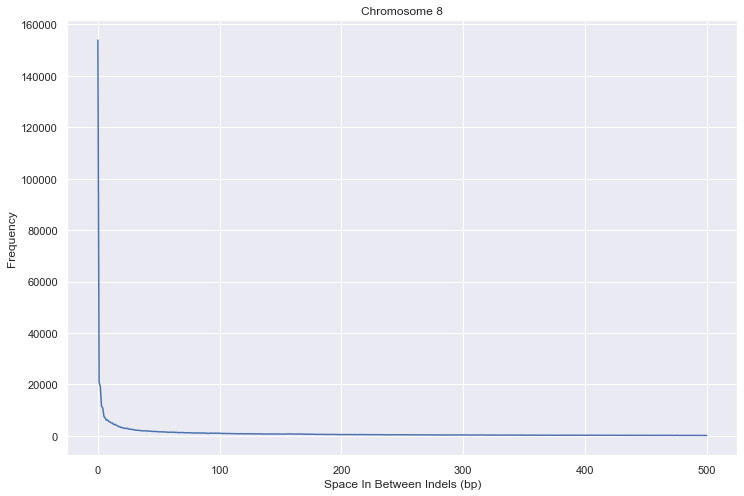

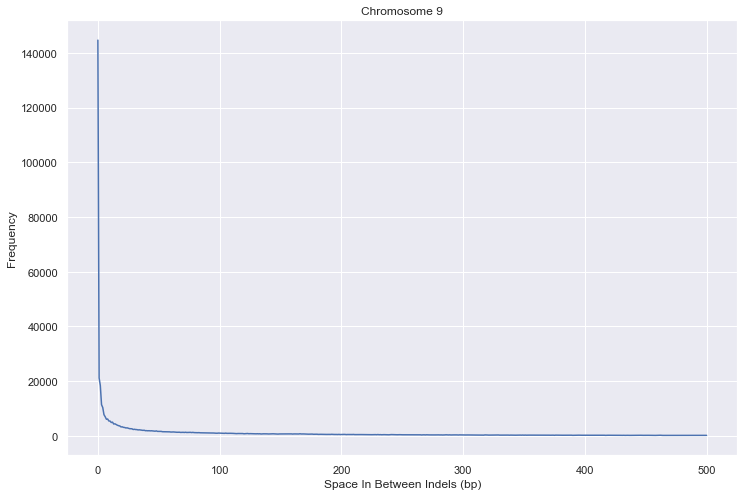

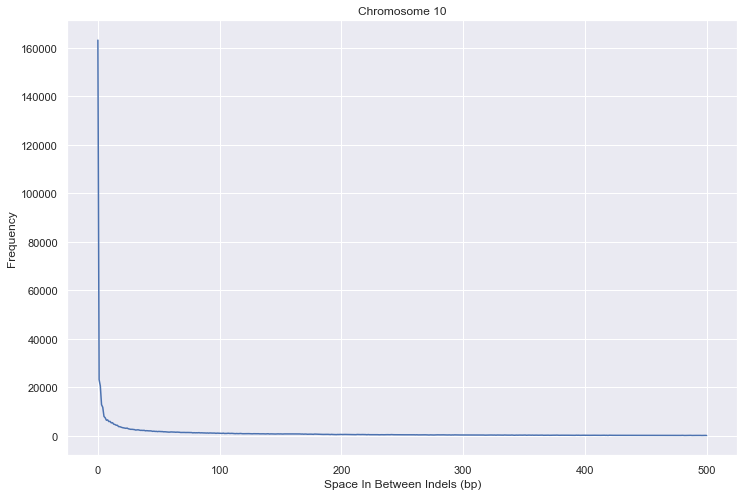

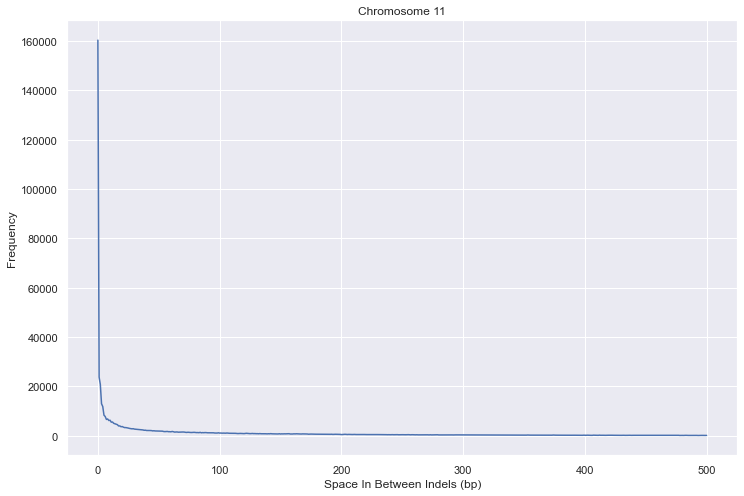

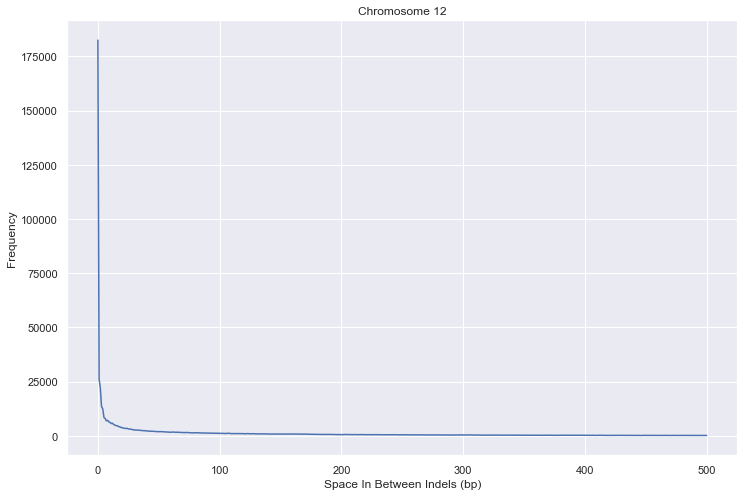

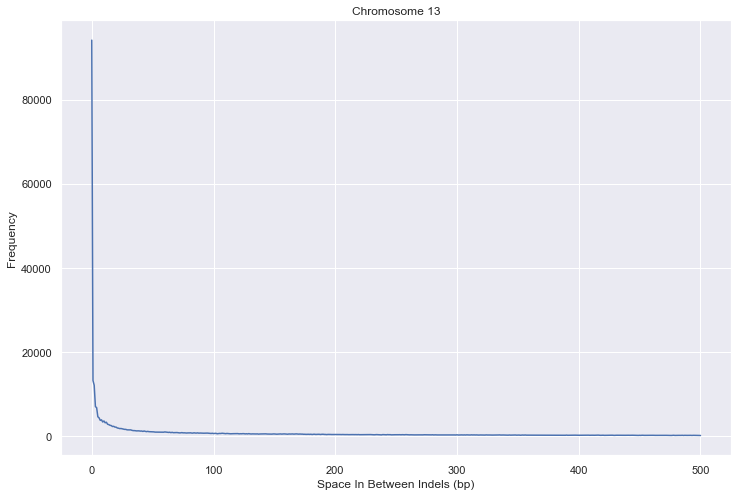

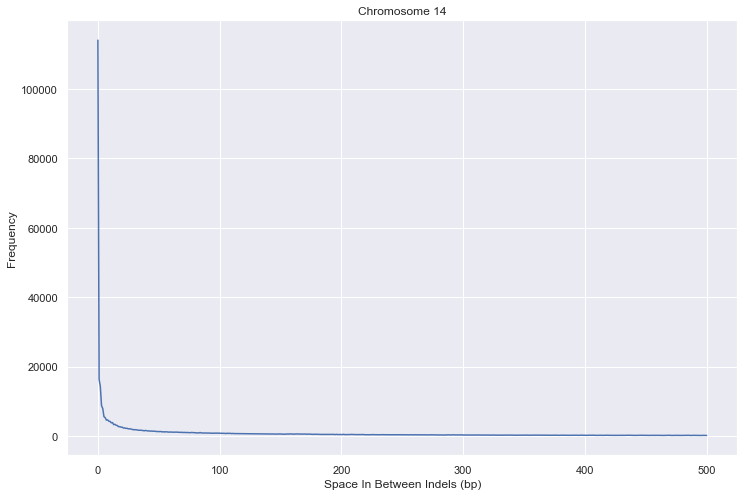

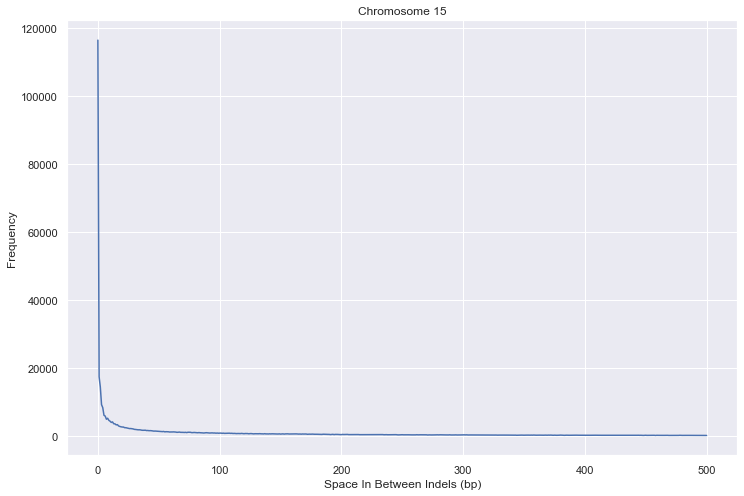

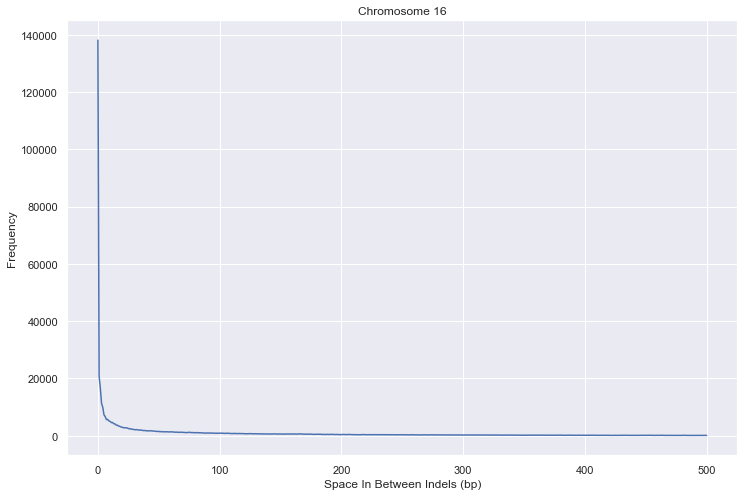

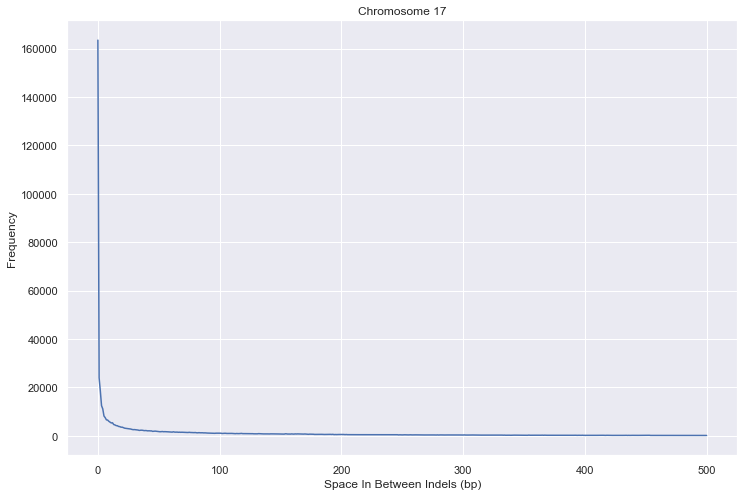

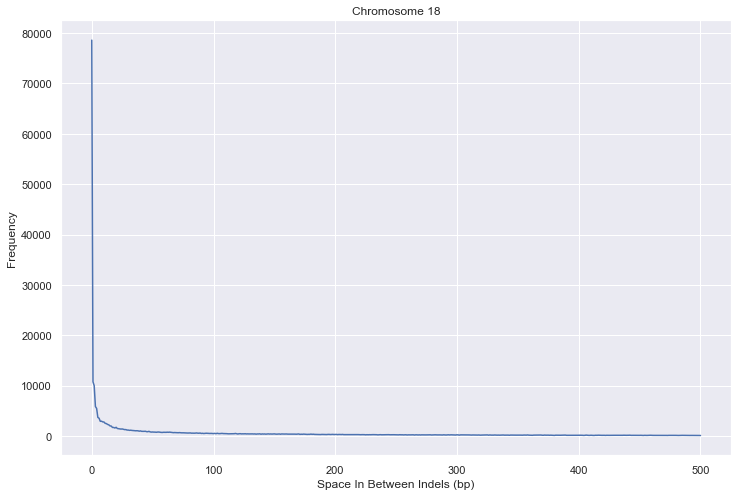

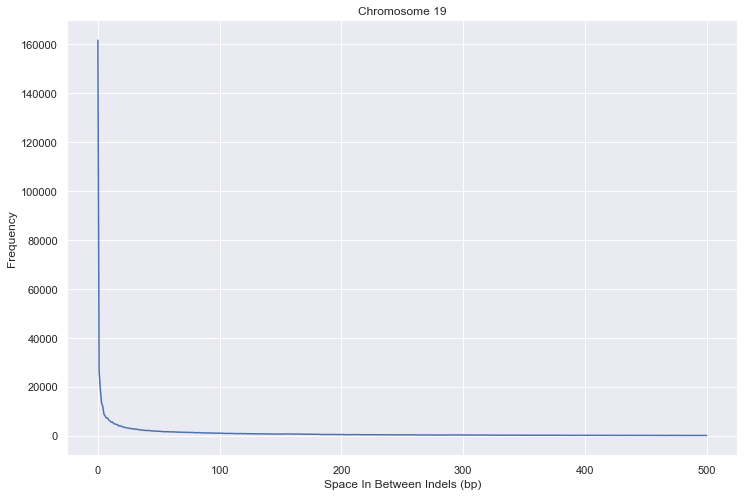

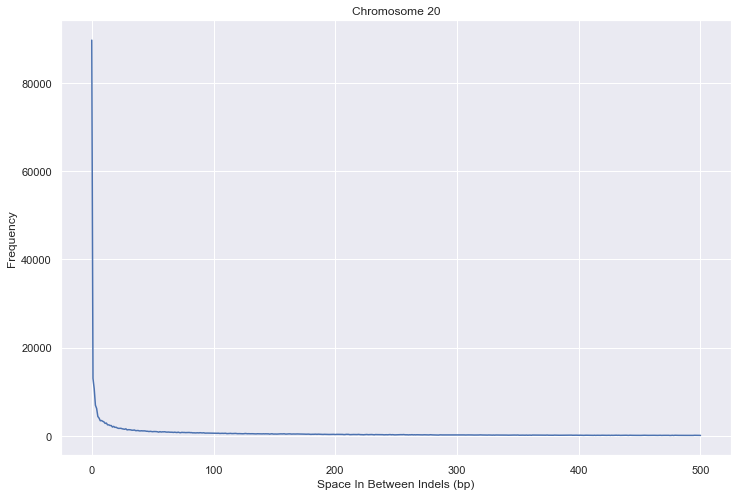

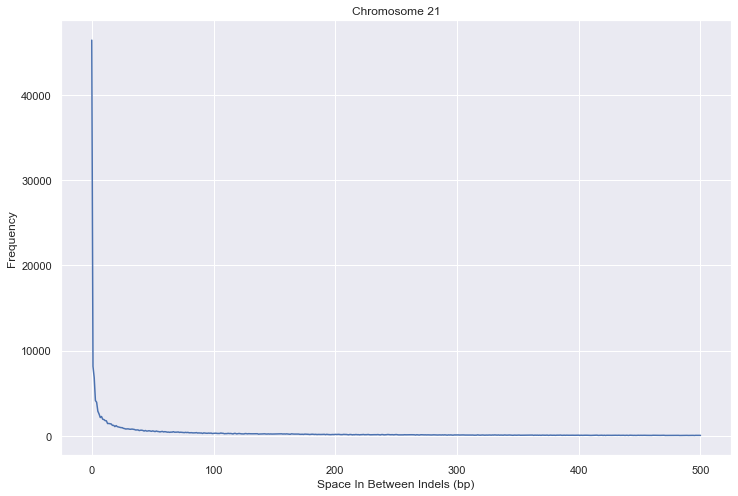

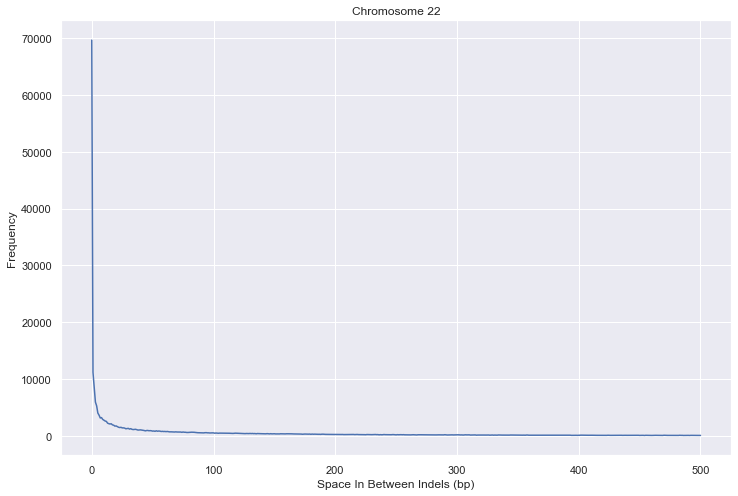

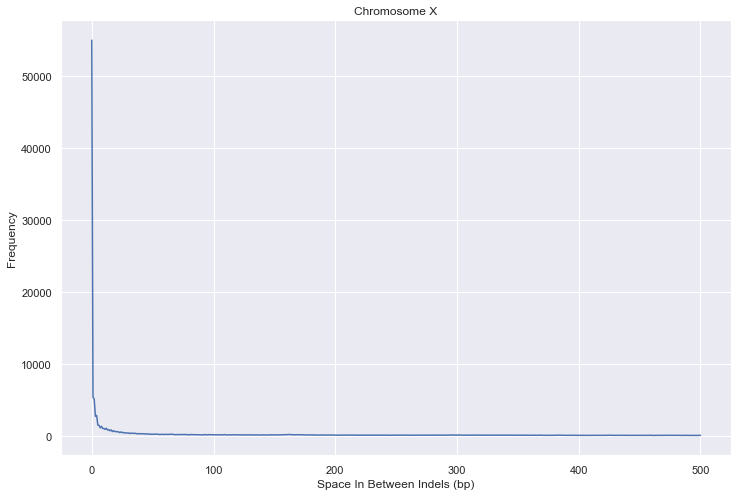

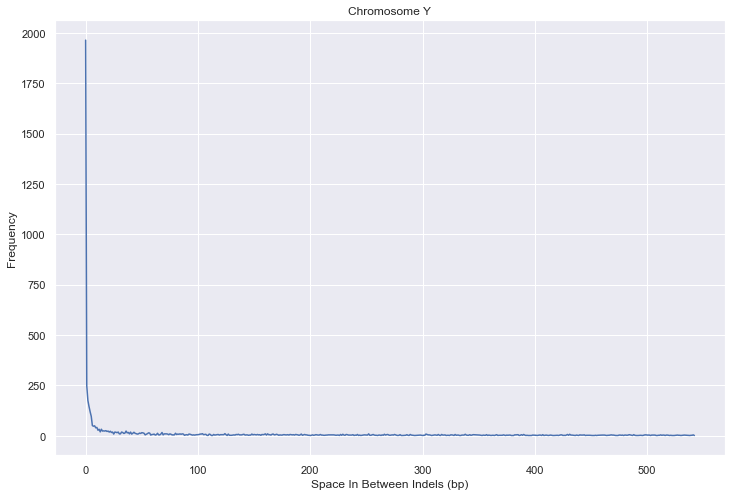

In [368]:
for i in range(0,len(Chromosomes)):
    vals = list(PositionCounter.values())
    n_items = take(501, vals[i].items())
    x, y = zip(*n_items) # unpack a list of pairs into two tuples
    plt.plot(x, y)
    plt.title('Chromosome %s'%(Chromosomes[i]))
    plt.xlabel('Space In Between Indels (bp)')
    plt.ylabel('Frequency')
    plt.savefig("Chromosome{C}.png".format(C=Chromosomes[i]))
    plt.show()